# Analysis of user behavior in a mobile application 

**Additional materials:**
   [Presentation](https://disk.yandex.ru/i/nZhcBvACvdVb0g)

**Description**

during analysis we will study the actions of users in the mobile app "Unnecessary Things", searching for connections and scenarios of actions leading to the target action - "viewing contacts"

**Purpose of analysis:** description of user behavior patterns leading to the target action

**Main tasks:** highlighting the main scenarios of user behavior in the application and a detailed analysis of user actions by groups.
       
**Analyzed data:** data about events that occurred for the first time in the mobile app "Unnecessary Things" after October 7, 2019 (Yandex.Practicum data)

**Study progress:** before the implementation of the main tasks, it will be necessary to review and prepare the data: checking data for errors, correcting errors,  implementing research tasks,  test statistical hypotheses and formulate conclusions.


# Table of contents #

* [Step 1. Preparation](#num1)
* [Step 2. Data pre-processing ](#num2)
* [Step 3. Exploratory analysis ](#num3)
* [Step 4. Testing statistical hypotheses](#num4)
* [Conclusion](#result)

<a id="num1"></a>
# Step 1. Preparation

In [1]:
import pandas as pd             
import matplotlib.pyplot as plt  
import numpy as np               
import seaborn as sns
import calendar
import datetime as dt            
import math as mth               
from scipy import stats as st  
import plotly.express as px
import math
from plotly import graph_objects as go
import pathlib
import requests


In [2]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [95]:
try:
    projects = pd.read_csv('ab_project_marketing_events.csv')
    users = pd.read_csv('final_ab_new_users.csv')
    events = pd.read_csv('final_ab_events.csv')
    participants = pd.read_csv('final_ab_participants.csv')

except FileNotFoundError :
    print('The specified file does not exist')

<a id="num2"></a>
# Step 2. Data pre-processing

In [96]:
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [99]:
def info(data):
    
    display(data.info())
    display(data.head())
    display(data.describe())
    display('Number of duplicates:', data.duplicated().sum())
    display('Number of passes:', data.isna().sum())

In [100]:
info(mobile_sourсes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


,userId,source
count,4293,4293
unique,4293,3
top,020292ab-89bc-4156-9acf-68bc2783f894,yandex
freq,1,1934


'Number of duplicates:'

0

'Number of passes:'

userId    0
source    0
dtype: int64

In [101]:
info(mobile_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


,event.time,event.name,user.id
count,74197,74197,74197
unique,74197,16,4293
top,2019-10-07 00:00:00.431357,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478


'Number of duplicates:'

0

'Number of passes:'

event.time    0
event.name    0
user.id       0
dtype: int64

The database contains data on user actions in the application and sources.
There are no missing values in the database, but we should rename the columns, change the data type of temporary variables and join the data into one table.

In [8]:
mobile_sourсes.columns = ['user_id', 'source']
mobile_dataset.columns = ['event_time', 'event_name', 'user_id']
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'], format='%Y.%m.%d %H:%M:%S').dt.round('1S')
data = mobile_sourсes.merge(mobile_dataset, on='user_id', how = 'right')
data.head()

,user_id,source,event_time,event_name
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00,advert_open
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01,tips_show
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:02,tips_show
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07,tips_show
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:56,advert_open


In [9]:
data['source'].value_counts()

yandex    34286
google    20445
other     19466
Name: source, dtype: int64

In [10]:
data['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

Using the function, we will join the contact_show and show_contact variables into one, because it is a one action. The actions related to the search will also be combined, since we do not have an explanation for the types of actions.

In [102]:
def change_variables(i):
    if i == 'contacts_show':
        name = 'show_contacts'
        return name
    elif 'search' in i:
        name = 'search'
        return name
    return i

data['event_name'] = data['event_name'].apply(change_variables)

In [103]:
data['event_name'].value_counts()

tips_show        39892
photos_show       9372
search            6694
advert_open       6145
show_contacts     4381
map               3760
favorites_add     1414
tips_click         811
contacts_call      538
Name: event_name, dtype: int64

After the change, we will check the database for duplicates again and delete the duplicate rows.

In [104]:
data.duplicated().sum()

0

In [105]:
data_dup=data[data.duplicated()]
data_dup

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number


In [106]:
data=data.drop_duplicates()

In [107]:
data.duplicated().sum()

0

In [108]:
data[['user_id','event_time']].duplicated().sum()

67

In [109]:
data_dup2=data[data.duplicated(['user_id','event_time'])]
data_dup2

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number
240,fb667205-a708-4693-832d-363a30022cfc,yandex,2019-10-07 09:31:18,advert_open,2019-10-07,Monday,41
791,b946256d-4b0e-4f14-b326-70309e8a5679,google,2019-10-07 13:36:02,tips_show,2019-10-07,Monday,41
2090,fc90ced6-314c-45e9-8d92-4d6d24bc791f,other,2019-10-07 21:54:55,advert_open,2019-10-07,Monday,41
2693,f5bc9d6e-5ea1-4576-b360-4e93872e7ef3,yandex,2019-10-08 09:10:22,tips_show,2019-10-08,Tuesday,41
2695,f5bc9d6e-5ea1-4576-b360-4e93872e7ef3,yandex,2019-10-08 09:10:36,tips_show,2019-10-08,Tuesday,41
...,...,...,...,...,...,...,...
68724,395bdd53-9193-452f-8b7c-bd4eebd15707,google,2019-11-01 18:50:24,show_contacts,2019-11-01,Friday,44
71244,8d9f19b7-1ec9-401e-82f4-2b2d026d89c6,yandex,2019-11-02 23:04:53,tips_show,2019-11-02,Saturday,44
71250,87a6fff9-134a-467d-a100-a606995025cd,other,2019-11-02 23:07:23,show_contacts,2019-11-02,Saturday,44
71668,8ddc4d05-93b8-44a9-b71b-6c60ce7d779c,yandex,2019-11-03 10:28:12,show_contacts,2019-11-03,Sunday,44


The data is corrected, there are no duplicates and missing values, the values are changed, the types of variables are corrected - we can proceed to the exploratory analysis.

<a id="num3"></a>
# Step 3. Exploratory analysis

**Time interval**

In [111]:
data['event_time'].min()

Timestamp('2019-10-07 00:00:00')

In [112]:
data['event_time'].max()

Timestamp('2019-11-03 23:58:13')

In [113]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
event_week_number,73007.0,42.5893,1.092881,41.0,42.0,43.0,44.0,44.0


In [114]:
data['event_day'] = data['event_time'].astype('datetime64[D]') 

In [115]:
active_user=data.groupby('user_id').agg({'event_name':'count'})
active_user.sort_values(by='event_name', ascending=False)

,event_name
user_id,
cb36854f-570a-41f4-baa8-36680b396370,472
e13f9f32-7ae3-4204-8d60-898db040bcfc,462
9ce63488-758a-481a-bcb5-a02b467e1d84,407
21230dd9-2f7f-4b77-a436-43d4d10388e0,398
be1449f6-ca45-4f94-93a7-ea4b079b8f0f,396
...,...
f81367bf-86de-4f2c-80d6-88871b7dccb8,1
552532d2-cf3b-4a1d-b6d9-e60e60e9c4e0,1
07b1849e-eb60-444d-98cb-f8516ad23a74,1


In [116]:
active_user_top=data.query('user_id=="cb36854f-570a-41f4-baa8-36680b396370"')
active_user_top['event_day'].value_counts()

2019-10-07    92
2019-10-08    63
2019-10-18    53
2019-10-28    51
2019-10-17    37
2019-10-09    35
2019-10-21    35
2019-10-22    25
2019-10-30    22
2019-11-01    21
2019-10-29    19
2019-10-31    15
2019-10-11     2
2019-10-25     2
Name: event_day, dtype: int64

In [117]:
#number of users per day
print('number of users per day', data.groupby('event_day').agg({'user_id': 'nunique'}).mean())
#average number of user actions per day
print('average number of user actions per day', data.groupby('event_day').agg({'user_id': 'count'}).mean()/data.groupby('event_day').agg({'user_id': 'nunique'}).mean())


number of users per day user_id    279.178571
dtype: float64
average number of user actions per day user_id    9.339516
dtype: float64


In [118]:
data_source = data.groupby('source', as_index=False).agg({'user_id':'nunique'}).sort_values(by='user_id',ascending=False)
data_source

,source,user_id
2,yandex,1934
1,other,1230
0,google,1129


In [119]:
data['event_name'].value_counts()

tips_show        39892
photos_show       9372
search            6694
advert_open       6145
show_contacts     4381
map               3760
favorites_add     1414
tips_click         811
contacts_call      538
Name: event_name, dtype: int64

In [120]:
#add a column with date and day of the week
data['event_day'] = data['event_time'].astype('datetime64[D]') 
data['event_week_day'] = data['event_time'].apply(lambda x: calendar.day_name[x.weekday()])
data.head()

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00,advert_open,2019-10-07,Monday,41
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01,tips_show,2019-10-07,Monday,41
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:02,tips_show,2019-10-07,Monday,41
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07,tips_show,2019-10-07,Monday,41
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:56,advert_open,2019-10-07,Monday,41


In [121]:
data['event_week_number']=data['event_time'].dt.week
data.head()

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00,advert_open,2019-10-07,Monday,41
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01,tips_show,2019-10-07,Monday,41
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:02,tips_show,2019-10-07,Monday,41
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07,tips_show,2019-10-07,Monday,41
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:56,advert_open,2019-10-07,Monday,41


In [122]:
data['event_week_number'].value_counts()

43    20202
44    19195
42    18041
41    15569
Name: event_week_number, dtype: int64

In [123]:
data_week=data[["event_day", "event_week_day"]]
data_week=data_week.drop_duplicates()
data_week.head()

,event_day,event_week_day
0,2019-10-07,Monday
2545,2019-10-08,Tuesday
5044,2019-10-09,Wednesday
7071,2019-10-10,Thursday
9314,2019-10-11,Friday


,event_day,user_id,event_week_day
0,2019-10-07,2516,Monday
1,2019-10-08,2462,Tuesday
2,2019-10-09,2010,Wednesday
3,2019-10-10,2218,Thursday
4,2019-10-11,1948,Friday
5,2019-10-12,1812,Saturday
6,2019-10-13,2603,Sunday
7,2019-10-14,3004,Monday
8,2019-10-15,2670,Tuesday
9,2019-10-16,2685,Wednesday


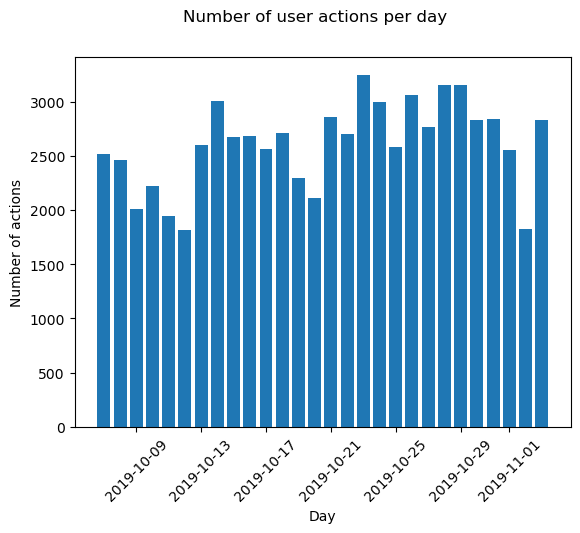

In [124]:
#consider user activity by day
count_by_day = data.groupby('event_day', as_index=False).agg({'user_id':'count'})
count_by_day=count_by_day.merge(data_week, on='event_day', how = 'right')
display(count_by_day)


plt.bar(count_by_day['event_day'], count_by_day['user_id'])
plt.xticks(rotation=45)
plt.suptitle('Number of user actions per day')
plt.xlabel('Day')
plt.ylabel('Number of actions');


,event_week_day,user_id
1,Monday,11537
5,Tuesday,10985
6,Wednesday,10777
4,Thursday,10606
3,Sunday,10308
0,Friday,9799
2,Saturday,8995


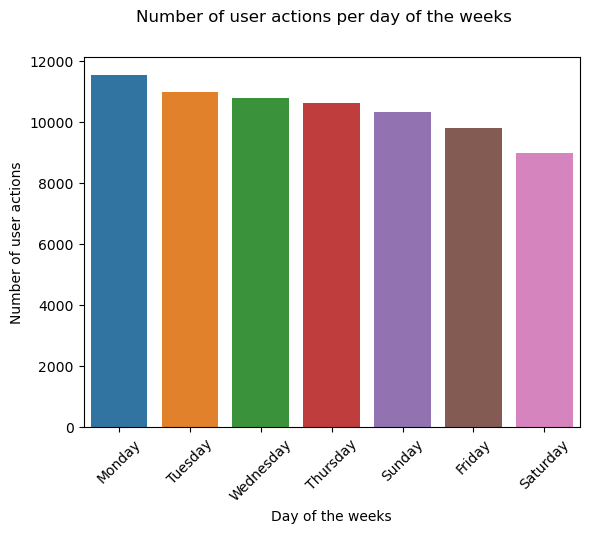

In [125]:

count_by_week_day = data.groupby('event_week_day', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)
display(count_by_week_day)

sns.barplot(x='event_week_day', y='user_id', data = count_by_week_day)
plt.xticks(rotation=45)
plt.suptitle('Number of user actions per day of the weeks')
plt.xlabel('Day of the weeks')
plt.ylabel('Number of user actions');

In [34]:
event_map = data.groupby(['event_day','event_name']).agg({'event_time':'count'}).reset_index()
event_map.columns = ['event_day', 'event_name', 'event_count']
event_sum = event_map.groupby('event_day').agg({'event_count':'sum'})['event_count'].reset_index()
event_sum.columns = ['event_day', 'event_sum']
event_map = event_map.merge(event_sum, on='event_day', how='left')
event_map

,event_day,event_name,event_count,event_sum
0,2019-10-07,advert_open,399,2516
1,2019-10-07,contacts_call,7,2516
2,2019-10-07,favorites_add,40,2516
3,2019-10-07,map,158,2516
4,2019-10-07,photos_show,226,2516
...,...,...,...,...
247,2019-11-03,photos_show,537,2833
248,2019-11-03,search,275,2833
249,2019-11-03,show_contacts,132,2833
250,2019-11-03,tips_click,28,2833


In [126]:
event_map_1 = px.bar(event_map, x='event_day', y='event_count', color='event_name')
event_map_1.update_layout(title_text='Distribution of events by day')
event_map_1.show()


Graphs show that users are active on a daily basis and there are no abnormal values, data is available for the entire analyzed period. There is a pattern in the activity of using the application: from Monday to Thursday users perform more actions in the application than in the period from Friday to Saturday.

   - The database contains data from 2019-10-07 to 2019-11-03
   - The database contains 73 007 events, the distribution of user activity is uniform with a slight decrease on weekends
   - Users come to the application through Yandex (1 934), Google (1 129), Other sources (1 230)
   - The most popular actions were “saw a recommended ad” (39 892).
   - On average, 279 users enter the application per day and 9 actions per user. But there are quite active users who perform several dozen actions daily.


In [127]:
#let's see how the number of events is distributed between users who performed the target action and those who didn't

event_map_contact_users= data.query('event_name=="show_contacts"')

event_mp2=data[(data.user_id.isin(event_map_contact_users.user_id))]
event_map3= event_mp2.groupby(['event_day','event_name']).agg({'event_time':'count'}).reset_index()
event_map3.columns = ['event_day', 'event_name', 'event_count']
event_sum2 = event_map3.groupby('event_day').agg({'event_count':'sum'})['event_count'].reset_index()
event_sum2.columns = ['event_day', 'event_sum']
event_map3 = event_map3.merge(event_sum2, on='event_day', how='left')

event_map_contact_users2= data.query('event_name=="show_contacts"')
list_users=event_map_contact_users2['user_id'].to_list()
event_mp6=data[~data['user_id'].isin(list_users)]
event_map7= event_mp6.groupby(['event_day','event_name']).agg({'event_time':'count'}).reset_index()
event_map7.columns = ['event_day', 'event_name', 'event_count']
event_sum3 = event_map7.groupby('event_day').agg({'event_count':'sum'})['event_count'].reset_index()
event_sum3.columns = ['event_day', 'event_sum']
event_map7 = event_map7.merge(event_sum3, on='event_day', how='left')


In [128]:
event_map_2 = px.bar(event_map3, x='event_day', y='event_count', color='event_name')
event_map_2.update_layout(title_text='Distribution of events by day (users with contact view)')
event_map_2.show()

event_map_4 = px.bar(event_map7, x='event_day', y='event_count', color='event_name')
event_map_4.update_layout(title_text='Distribution of events by day (users without viewing contacts)')
event_map_4.show()

The nature of the distribution in the two groups of users is similar. The main action is viewing recommended ads. The application is more used by users who have not reached the target action. To analyze business performance, you should consider user actions within sessions in order to exclude situations where we will draw conclusions about user actions based on different periods of interaction with the application.

**Adding sessions**

In [38]:
event_df = data.sort_values(['user_id', 'event_time'])
event_df.head()

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number
805,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,tips_show,2019-10-07,Monday,41
806,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,tips_show,2019-10-07,Monday,41
809,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:06,tips_show,2019-10-07,Monday,41
820,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:21,tips_show,2019-10-07,Monday,41
830,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:31,tips_show,2019-10-07,Monday,41


In [39]:
event_df['diff'] = event_df.groupby('user_id')['event_time'].diff(1)
event_df.head()

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number,diff
805,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,tips_show,2019-10-07,Monday,41,NaT
806,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,tips_show,2019-10-07,Monday,41,0 days 00:00:45
809,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:06,tips_show,2019-10-07,Monday,41,0 days 00:00:35
820,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:21,tips_show,2019-10-07,Monday,41,0 days 00:02:15
830,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:31,tips_show,2019-10-07,Monday,41,0 days 00:02:10


In [40]:
check100=event_df
check100['diff_2']=check100['diff']/np.timedelta64(1, 's')
check100

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number,diff,diff_2
805,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,tips_show,2019-10-07,Monday,41,NaT,NaN
806,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,tips_show,2019-10-07,Monday,41,0 days 00:00:45,45.0
809,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:06,tips_show,2019-10-07,Monday,41,0 days 00:00:35,35.0
820,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:21,tips_show,2019-10-07,Monday,41,0 days 00:02:15,135.0
830,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:31,tips_show,2019-10-07,Monday,41,0 days 00:02:10,130.0
...,...,...,...,...,...,...,...,...,...
72584,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:24,tips_show,2019-11-03,Sunday,44,0 days 00:00:28,28.0
72589,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:58,show_contacts,2019-11-03,Sunday,44,0 days 00:00:34,34.0
72684,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:07:41,tips_show,2019-11-03,Sunday,44,0 days 00:15:43,943.0
72688,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:08:18,tips_show,2019-11-03,Sunday,44,0 days 00:00:37,37.0


In [41]:
check100['diff_2'].value_counts()

4.0         1340
3.0         1264
5.0         1173
1.0         1159
6.0         1082
            ... 
10552.0        1
678855.0       1
8919.0         1
17717.0        1
2837.0         1
Name: diff_2, Length: 7292, dtype: int64

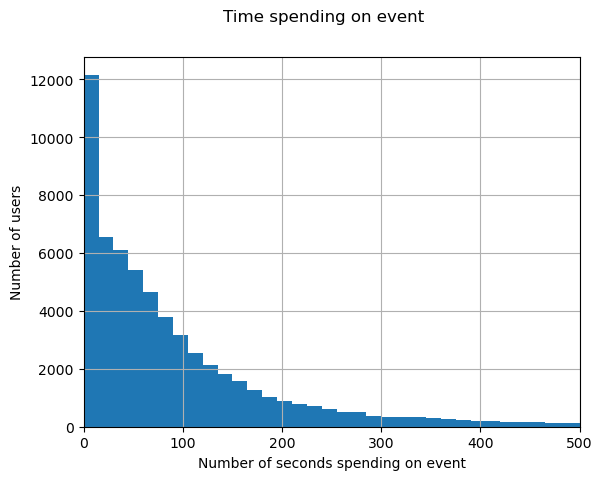

In [129]:
check100['diff_2'].hist(bins=100, range=(0, 1500))
plt.xlim(0, 500)
plt.suptitle('Time spending on event')
plt.xlabel('Number of seconds spending on event')
plt.ylabel('Number of users'); 

Most of the users do not stay long on the page. Users spend several tens of seconds on the page and go to the next one. At the same time, during one entry they make several transitions between pages. To exclude situations when we will draw conclusions about user actions based on different periods of interaction with the application, we will add sessions, where the time between “user activities” is more than 30 minutes. If we take only a few minutes between sessions, we run the risk of replacing a session interruption with a long stay on the page, yet not all transitions are made quickly. However, the number of transitions over 10 minutes is extremely small. If we increase the time between sessions to an hour or two, then we risk missing a new session. Let's leave a break time of 30 minutes, as the most optimal for further calculations.

In [43]:
event_df['id']=event_df.index
event_df

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number,diff,diff_2,id
805,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,tips_show,2019-10-07,Monday,41,NaT,NaN,805
806,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,tips_show,2019-10-07,Monday,41,0 days 00:00:45,45.0,806
809,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:06,tips_show,2019-10-07,Monday,41,0 days 00:00:35,35.0,809
820,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:21,tips_show,2019-10-07,Monday,41,0 days 00:02:15,135.0,820
830,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:31,tips_show,2019-10-07,Monday,41,0 days 00:02:10,130.0,830
...,...,...,...,...,...,...,...,...,...,...
72584,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:24,tips_show,2019-11-03,Sunday,44,0 days 00:00:28,28.0,72584
72589,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:58,show_contacts,2019-11-03,Sunday,44,0 days 00:00:34,34.0,72589
72684,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:07:41,tips_show,2019-11-03,Sunday,44,0 days 00:15:43,943.0,72684
72688,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:08:18,tips_show,2019-11-03,Sunday,44,0 days 00:00:37,37.0,72688


In [130]:
#create a base to highlight events that happened more than 30 minutes after the previous one,
#or events that were the first for the user


sessions_start_df = event_df[(event_df['diff'].isnull()) | (event_df['diff'] > '1800 seconds')]
sessions_start_df['session_id'] = sessions_start_df['id']
display(sessions_start_df)

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number,diff,diff_2,id,session_id,is_first_event_in_session,time_on_page
795,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,tips_show,2019-10-07,Monday,41,NaT,NaN,805,805,True,45.0
6466,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09 18:33:56,map,2019-10-09,Wednesday,41,2 days 04:44:14,189854.0,6541,6541,True,92.0
35842,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-21 19:52:31,tips_show,2019-10-21,Monday,43,12 days 01:10:08,1041008.0,36412,36412,True,46.0
36972,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22 11:18:15,map,2019-10-22,Tuesday,43,0 days 15:10:45,54645.0,37556,37556,True,56.0
31135,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-19 21:34:34,search,2019-10-19,Saturday,42,NaT,NaN,31632,31632,True,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68391,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-02 01:16:49,tips_show,2019-11-02,Saturday,44,1 days 00:51:56,89516.0,69525,69525,True,NaN
69443,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-02 18:01:27,tips_show,2019-11-02,Saturday,44,0 days 16:44:38,60278.0,70585,70585,True,974.0
69626,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-02 19:25:54,tips_show,2019-11-02,Saturday,44,0 days 01:08:13,4093.0,70771,70771,True,14.0
71154,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 14:32:56,tips_show,2019-11-03,Sunday,44,0 days 19:02:06,68526.0,72321,72321,True,52.0


In [133]:
event_df = event_df.sort_values('id')
sessions_start_df = sessions_start_df.sort_values('id')
event_df = pd.merge_asof(event_df,sessions_start_df[['id','user_id','session_id']],on='id',by='user_id')

In [134]:
#calculate how much time the user spends on the event

event_df = event_df.sort_values(['user_id','event_time'])
event_df['is_first_event_in_session'] = event_df['id'] == event_df['session_id']
event_df['time_on_page'] = event_df.groupby(['session_id'])['event_time'].diff(1)
event_df['time_on_page'] = event_df.groupby(['session_id'])['time_on_page'].shift(-1)
event_df['time_on_page'] = event_df['time_on_page'] / np.timedelta64(1, 's')

display(event_df.head())

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number,diff,diff_2,id,session_id_x,is_first_event_in_session,time_on_page,session_id_y,session_id
795,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,tips_show,2019-10-07,Monday,41,NaT,NaN,805,805,True,45.0,805,805
796,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,tips_show,2019-10-07,Monday,41,0 days 00:00:45,45.0,806,805,False,35.0,805,805
799,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:06,tips_show,2019-10-07,Monday,41,0 days 00:00:35,35.0,809,805,False,135.0,805,805
810,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:21,tips_show,2019-10-07,Monday,41,0 days 00:02:15,135.0,820,805,False,130.0,805,805
818,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:31,tips_show,2019-10-07,Monday,41,0 days 00:02:10,130.0,830,805,False,12.0,805,805


In [144]:
print ('Number of users: {0}'.format(event_df['user_id'].nunique()))
print ('Number os sessions: {0}'.format(event_df['session_id'].nunique()))
print ("Number of page's shows: {0}".format(event_df['id'].count()))
print ('Average page view time: {0}'.format(event_df['time_on_page'].mean()))

Number of users: 4293
Number os sessions: 10368
Number of page's shows: 73007
Average page view time: 127.89208001404876


In [138]:
event_df.query('session_id==2850')

,user_id,source,event_time,event_name,event_day,event_week_day,event_week_number,diff,diff_2,id,session_id_x,is_first_event_in_session,time_on_page,session_id_y,session_id
2820,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,2019-10-08 10:47:17,tips_show,2019-10-08,Tuesday,41,NaT,NaN,2850,2850,True,211.0,2850,2850
2832,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,2019-10-08 10:50:48,tips_show,2019-10-08,Tuesday,41,0 days 00:03:31,211.0,2862,2850,False,197.0,2850,2850
2845,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,2019-10-08 10:54:05,tips_show,2019-10-08,Tuesday,41,0 days 00:03:17,197.0,2875,2850,False,97.0,2850,2850
2851,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,2019-10-08 10:55:42,tips_show,2019-10-08,Tuesday,41,0 days 00:01:37,97.0,2881,2850,False,303.0,2850,2850
2859,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,2019-10-08 11:00:45,tips_show,2019-10-08,Tuesday,41,0 days 00:05:03,303.0,2889,2850,False,49.0,2850,2850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,2019-10-08 15:02:19,tips_show,2019-10-08,Tuesday,41,0 days 00:01:57,117.0,3829,2850,False,97.0,2850,2850
3793,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,2019-10-08 15:03:56,tips_show,2019-10-08,Tuesday,41,0 days 00:01:37,97.0,3834,2850,False,103.0,2850,2850
3800,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,2019-10-08 15:05:39,tips_show,2019-10-08,Tuesday,41,0 days 00:01:43,103.0,3841,2850,False,38.0,2850,2850
3803,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,2019-10-08 15:06:17,tips_show,2019-10-08,Tuesday,41,0 days 00:00:38,38.0,3844,2850,False,29.0,2850,2850


In [139]:
diff22 = event_df.sort_values(by=['event_time']).groupby(['user_id', 'session_id'], as_index=False).agg({'event_time': ['first', 'last']})
diff22.columns = ['_'.join(col).rstrip('_') for col in diff22.columns.values]
diff22.round(2)
diff22['time_in_app']=diff22['event_time_last']-diff22['event_time_first']
diff22['time_in_app']=diff22['time_in_app']/np.timedelta64(1, 's')

diff22

,user_id,session_id,event_time_first,event_time_last,time_in_app
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,805,2019-10-07 13:39:46,2019-10-07 13:49:42,596.0
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,6541,2019-10-09 18:33:56,2019-10-09 18:42:23,507.0
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,36412,2019-10-21 19:52:31,2019-10-21 20:07:30,899.0
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,37556,2019-10-22 11:18:15,2019-10-22 11:30:53,758.0
4,00157779-810c-4498-9e05-a1e9e3cedf93,31632,2019-10-19 21:34:34,2019-10-19 21:59:55,1521.0
...,...,...,...,...,...
10363,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,69525,2019-11-02 01:16:49,2019-11-02 01:16:49,0.0
10364,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,70585,2019-11-02 18:01:27,2019-11-02 18:17:41,974.0
10365,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,70771,2019-11-02 19:25:54,2019-11-02 19:30:50,296.0
10366,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,72321,2019-11-03 14:32:56,2019-11-03 14:48:44,948.0


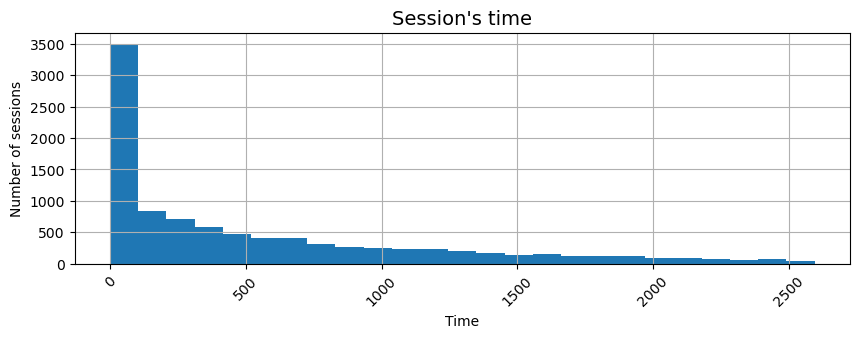

In [143]:
diff23=diff22.query('time_in_app<2600')
diff23.time_in_app.hist(bins=25, figsize=(10,3))
plt.title("Session's time", size=14)
plt.xlabel("Time")
plt.ylabel('Number of sessions')
plt.xticks(rotation=45);

In [51]:
diff26=diff22.query('time_in_app==0')
diff26

,user_id,session_id,event_time_first,event_time_last,time_in_app
9,00157779-810c-4498-9e05-a1e9e3cedf93,72809,2019-11-03 17:12:10,2019-11-03 17:12:10,0.0
19,00551e79-152e-4441-9cf7-565d7eb04090,58047,2019-10-29 02:17:12,2019-10-29 02:17:12,0.0
26,00753c79-ea81-4456-acd0-a47a23ca2fb9,32876,2019-10-20 14:57:06,2019-10-20 14:57:06,0.0
33,00a93a72-3bbc-4ee7-8a81-7134f45ae009,28490,2019-10-18 15:51:02,2019-10-18 15:51:02,0.0
42,013bbb57-ca6f-4af3-b586-4a046d3d3dee,9882,2019-10-11 12:20:49,2019-10-11 12:20:49,0.0
...,...,...,...,...,...
10330,ff82c7c7-16d6-44b1-833b-a217747b0b02,63615,2019-10-30 20:59:42,2019-10-30 20:59:42,0.0
10341,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,24208,2019-10-16 22:51:41,2019-10-16 22:51:41,0.0
10342,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,25058,2019-10-17 11:49:24,2019-10-17 11:49:24,0.0
10361,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,61768,2019-10-30 11:31:46,2019-10-30 11:31:46,0.0


Thanks to dedicated sessions, we will be able to determine how much a user spends on average per session and the frequency of sessions per user. As we can see, most often users enter the application to carry out a quick search for ads and do not stay in the application for a long time.

Moreover, there are sessions with zero duration, these are sessions in which only 1 action is performed. There are quite a lot of such sessions (more than 20%), so we cannot delete them. On the other hand, they are of no value for our analysis, since we are interested in considering the chain of events and what leads to the target action. For the further analysis, we will delete these lines, but keep in mind that such actions should be studied separately in the following studies: why does the user not continue on his way? Probably, there may be technical difficulties when working with the application. But to calculate averages, we will not delete these lines, as this will distort the real picture.

In [52]:
diff24=diff22.query('time_in_app>0')
diff24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8226 entries, 0 to 10367
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           8226 non-null   object        
 1   session_id        8226 non-null   int64         
 2   event_time_first  8226 non-null   datetime64[ns]
 3   event_time_last   8226 non-null   datetime64[ns]
 4   time_in_app       8226 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 385.6+ KB


In [ ]:
print ('Average amount of time spent in 1 session: {0}'.format(diff24['time_in_app'].mean()/60), 'minutes')
print ('Average number of sessions per user: {0}'.format(diff24['session_id'].count()/diff24['user_id'].count()))


In [146]:
diff26=diff22.groupby('user_id').agg({'session_id': 'count' })
diff26['session_id'].value_counts()

1     2300
2      878
3      462
4      239
5      109
6       77
7       55
8       32
9       23
11      22
12      16
14      11
10       9
15       8
19       6
13       6
17       5
22       4
23       3
24       3
31       3
27       2
18       2
25       2
16       2
36       2
32       2
26       1
38       1
20       1
50       1
29       1
21       1
45       1
99       1
52       1
30       1
Name: session_id, dtype: int64

In [147]:
diff25=event_df.groupby('session_id').agg({'event_name': 'nunique' })
diff25['event_name'].value_counts()

1    5292
2    3258
3    1315
4     420
5      77
6       6
Name: event_name, dtype: int64

**Conclusion:**

The studied tables and graphs show that users mainly enter the application for a short period of time, watch ads and exit the application. Some users do perform a large number of the same type of actions and spend a lot of time in the application, but they are a minority. In general, users spend less than 12 minutes per login to the application, performing from 1 to 3 actions.

**Retention Rate и Conversion Rate**

Retention Rate

In [148]:
from datetime import date
diff_rr = event_df.sort_values(by=['event_week_number']).groupby(['user_id'], as_index=False).agg({'event_week_number': ['first', 'last']})
diff_rr.columns = ['_'.join(col).rstrip('_') for col in diff_rr.columns.values]
diff_rr.round(2)
diff_rr


,user_id,event_week_number_first,event_week_number_last
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,41,43
1,00157779-810c-4498-9e05-a1e9e3cedf93,42,44
2,00463033-5717-4bf1-91b4-09183923b9df,44,44
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,42,44
4,00551e79-152e-4441-9cf7-565d7eb04090,43,44
...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,41,43
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,41,41
4290,ffcf50d9-293c-4254-8243-4890b030b238,43,43
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,43,44


In [149]:
result_raw=diff_rr
result_raw['lifetime'] = (
    result_raw['event_week_number_last'] - result_raw['event_week_number_first']
)


cohort_sizes = result_raw.groupby(['event_week_number_first','lifetime']).agg({'user_id':'nunique'}).reset_index()

number_users = cohort_sizes[cohort_sizes['lifetime'] == 0][['event_week_number_first','user_id']]
number_users  = number_users .rename(columns={'user_id':'users_count'})
cohort_sizes = cohort_sizes.merge(number_users ,on='event_week_number_first')
cohort_sizes['retention'] = cohort_sizes['user_id']/cohort_sizes['users_count']

retention_pivot = cohort_sizes.pivot_table(index='event_week_number_first',columns='lifetime',values='retention',aggfunc='sum').fillna(0)
retention_pivot

lifetime,0,1,2,3
event_week_number_first,,,,
41,1.0,0.202381,0.134921,0.157407
42,1.0,0.219542,0.186972,0.000000
43,1.0,0.279532,0.000000,0.000000
44,1.0,0.000000,0.000000,0.000000


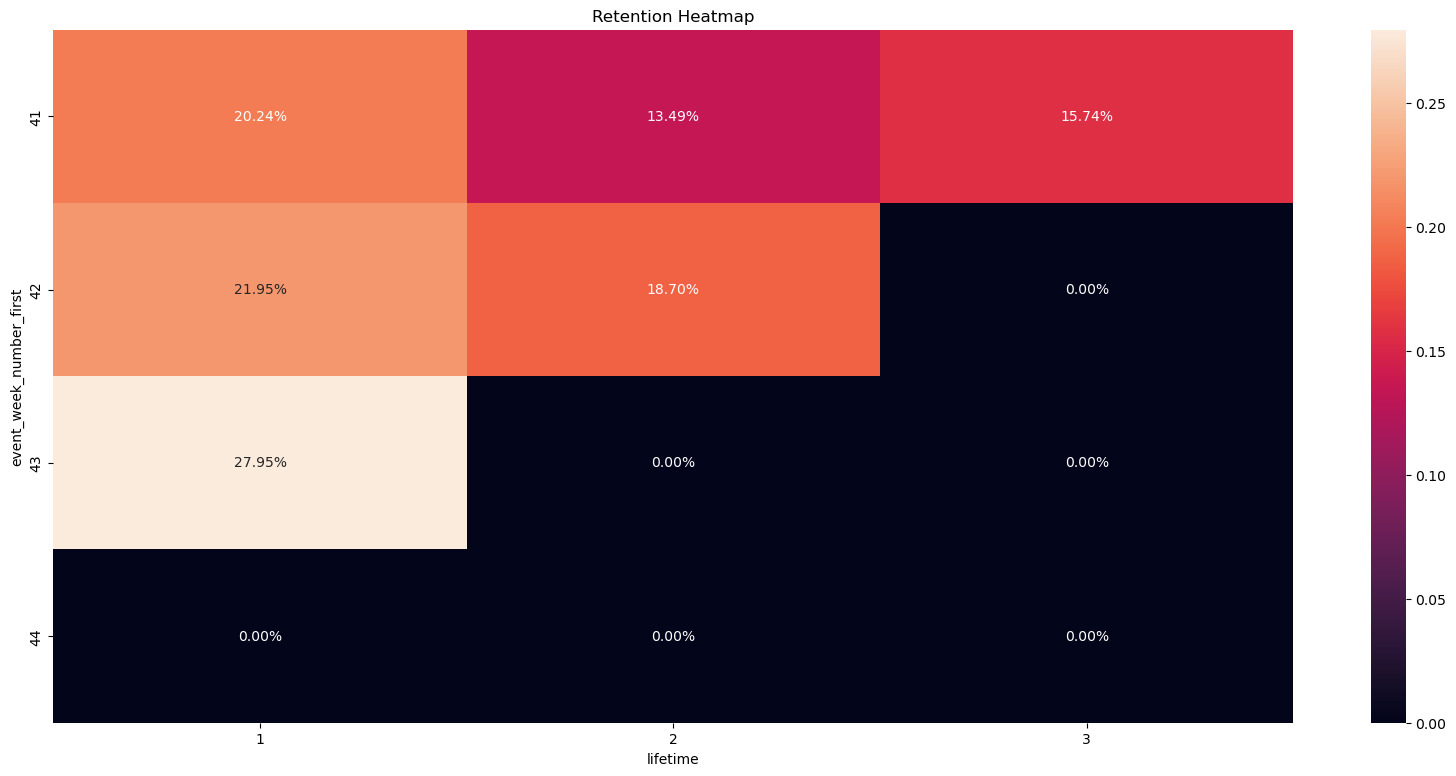

In [150]:

plt.figure(figsize=(20, 9)) 
sns.heatmap(
    retention_pivot.drop(columns=[0]), 
    annot=True,  
    fmt='.2%',  
)
plt.title('Retention Heatmap')  
plt.show()

Retention Rate increases across cohorts over time. Users who come in the third week stay for the second week more than the users of the first week. It is interesting to look at more than 4 weeks of data to see if this trend continues. But it is common for all cohorts that the more time the cohort spends in the application, the fewer users remain active.

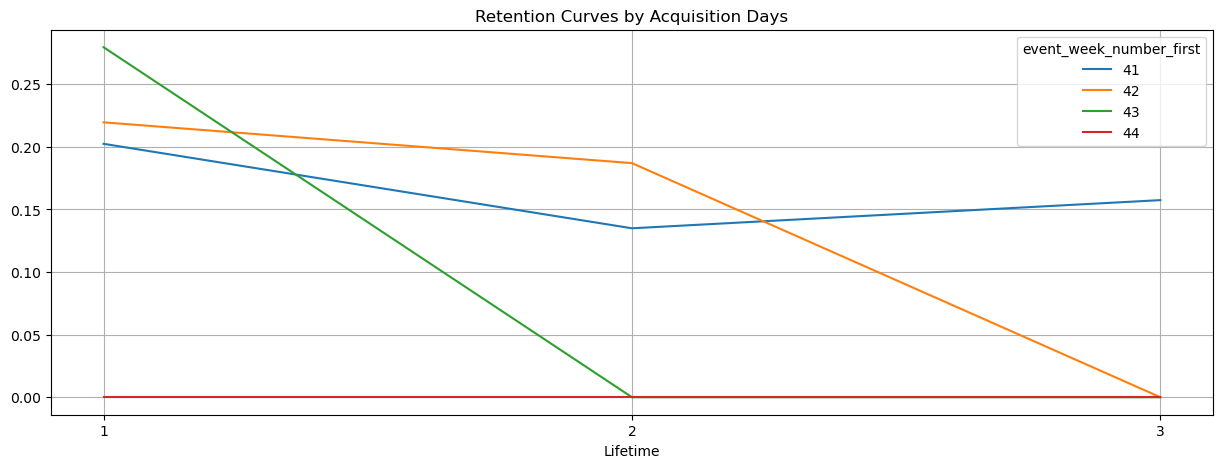

In [151]:
report = retention_pivot.drop(columns = [0])

report.T.plot(
    grid=True,  
    xticks=list(report.columns.values),  
    figsize=(15, 5),  
)
plt.xlabel('Lifetime') 
plt.title('Retention Curves by Acquisition Days') 
plt.show()

A small percentage of users return to the app in that amount of time. Most likely, users come and perform all the necessary actions at a time, and after a few months, when they have accumulated more things or need things, they return to the application. But it takes longer to return.

**Conversion Rate**

We will consider the target action - show_contact

In [152]:
purchases=event_df[['user_id', 'event_name','event_time']]
purchases=purchases.query('event_name=="show_contacts"')
purchases

,user_id,event_name,event_time
33002,00157779-810c-4498-9e05-a1e9e3cedf93,show_contacts,2019-10-20 19:17:19
33013,00157779-810c-4498-9e05-a1e9e3cedf93,show_contacts,2019-10-20 19:23:12
33032,00157779-810c-4498-9e05-a1e9e3cedf93,show_contacts,2019-10-20 19:30:32
33083,00157779-810c-4498-9e05-a1e9e3cedf93,show_contacts,2019-10-20 20:04:53
59679,00157779-810c-4498-9e05-a1e9e3cedf93,show_contacts,2019-10-29 21:26:40
...,...,...,...
71175,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,show_contacts,2019-11-03 14:38:51
71182,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,show_contacts,2019-11-03 14:41:25
71186,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,show_contacts,2019-11-03 14:42:26
71384,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,show_contacts,2019-11-03 15:48:05


In [153]:
users_1 = event_df.sort_values(by=['event_time']).groupby(['user_id'], as_index=False).agg({'event_time':'first'})
users_1

,user_id,event_time
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:34
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:06
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:50
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:34


In [154]:
user_2=event_df.merge(users_1, on='user_id', how='left')
user_2.head()

,user_id,source,event_time_x,event_name,event_day,event_week_day,event_week_number,diff,diff_2,id,session_id_x,is_first_event_in_session,time_on_page,session_id_y,session_id,event_time_y
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,tips_show,2019-10-07,Monday,41,NaT,NaN,805,805,True,45.0,805,805,2019-10-07 13:39:46
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,tips_show,2019-10-07,Monday,41,0 days 00:00:45,45.0,806,805,False,35.0,805,805,2019-10-07 13:39:46
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:06,tips_show,2019-10-07,Monday,41,0 days 00:00:35,35.0,809,805,False,135.0,805,805,2019-10-07 13:39:46
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:21,tips_show,2019-10-07,Monday,41,0 days 00:02:15,135.0,820,805,False,130.0,805,805,2019-10-07 13:39:46
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:31,tips_show,2019-10-07,Monday,41,0 days 00:02:10,130.0,830,805,False,12.0,805,805,2019-10-07 13:39:46


In [155]:
user_3=user_2[['user_id', 'source', 'event_time_y','event_day','event_name']]
user_3

,user_id,source,event_time_y,event_day,event_name
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,2019-10-07,tips_show
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,2019-10-07,tips_show
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,2019-10-07,tips_show
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,2019-10-07,tips_show
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:46,2019-10-07,tips_show
...,...,...,...,...,...
73002,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-10-12 00:57:21,2019-11-03,tips_show
73003,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-10-12 00:57:21,2019-11-03,show_contacts
73004,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-10-12 00:57:21,2019-11-03,tips_show
73005,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-10-12 00:57:21,2019-11-03,tips_show


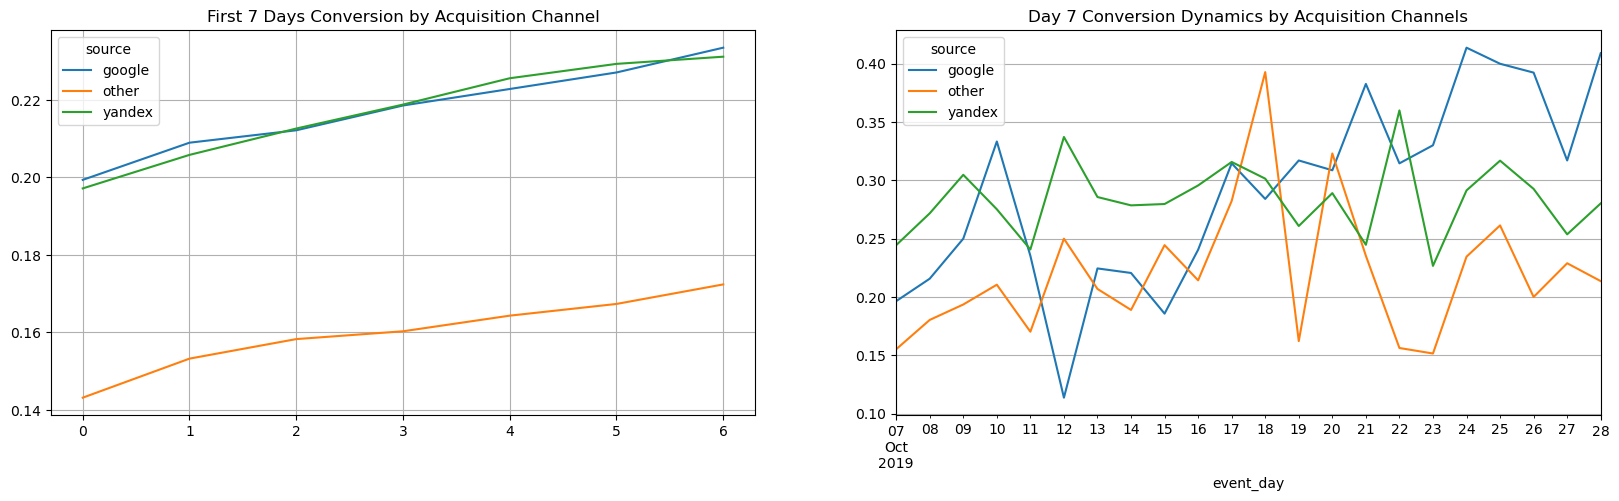

In [156]:
from datetime import timedelta

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('event_day <= @last_suitable_acquisition_date')

    
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index()
    )

    
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_time']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['event_time_y']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['event_day'], horizon_days
    )

    
    return result_raw, result_grouped, result_in_time


observation_date = user_3['event_time_y'].max()  

analysis_horizon = 7  

conversion_raw, conversion, conversion_history = get_conversion(user_3, purchases, observation_date, analysis_horizon, dimensions=['source']) # получите сырые данные, таблицу конверсии и таблицу динамики конверсии

plt.figure(figsize=(20, 5))


report = conversion.drop(columns=['cohort_size'])

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('First 7 Days Conversion by Acquisition Channel')

report = (
    conversion_history[6]
    .reset_index()
    .pivot_table(index='event_day', columns='source', values=6, aggfunc='mean')
    .fillna(0)) 
report.plot(
    
    grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Day 7 Conversion Dynamics by Acquisition Channels')

plt.show()

The conversion of users attracted through the Yandex and Google channels is higher than that of users who came through other channels. Conversion at the end of the first week of life at Google is growing. Investing in this channel seems promising.

**Conclusion**

Analysis of business indicators made it possible to determine that with each new cohort, user behavior changes. The more time a cohort spends in an app, the fewer users log into the app. There is an increase in percentage on both the 5th and the 7th day, however, this increase is extremely small. All cohorts behave in a similar way, showing no increase in activity.

**Influence of various events on the completion of events *show_contacts***

In [157]:
user_sankey2=event_df[['user_id', 'session_id', 'event_day', 'event_name', 'source']]
user_sankey2.rename(columns={'source':'source2'}, inplace = True )
user_sankey2=user_sankey2.drop_duplicates(subset=['session_id', 'event_name'], keep='last')

user_sankey2

,user_id,session_id,event_day,event_name,source2
827,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,805,2019-10-07,tips_show,other
6471,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,6541,2019-10-09,map,other
6491,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,6541,2019-10-09,tips_show,other
35860,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,36412,2019-10-21,map,other
35916,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,36412,2019-10-21,tips_show,other
...,...,...,...,...,...
69644,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,70771,2019-11-02,tips_show,google
71186,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,72321,2019-11-03,show_contacts,google
71197,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,72321,2019-11-03,tips_show,google
71420,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,72487,2019-11-03,show_contacts,google


In [158]:
def add_features(df):

    
 
    sorted_df = df.sort_values(by=['session_id', 'event_day']).copy()
    sorted_df['step'] = sorted_df.groupby('session_id').cumcount() + 1
    
    
    sorted_df['source'] = sorted_df['event_name']
    sorted_df['target'] = sorted_df.groupby('session_id')['source'].shift(-1)
    

    return sorted_df.drop(['event_name'], axis=1)
  

table = add_features(user_sankey2)
table

,user_id,session_id,event_day,source2,step,source,target
60,020292ab-89bc-4156-9acf-68bc2783f894,0,2019-10-07,other,1,map,advert_open
68,020292ab-89bc-4156-9acf-68bc2783f894,0,2019-10-07,other,2,advert_open,tips_show
69,020292ab-89bc-4156-9acf-68bc2783f894,0,2019-10-07,other,3,tips_show,NaN
73,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,2019-10-07,yandex,1,advert_open,tips_click
97,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,2019-10-07,yandex,2,tips_click,tips_show
...,...,...,...,...,...,...,...
72987,d157bffc-264d-4464-8220-1cc0c42f43a9,74177,2019-11-03,google,1,map,advert_open
72992,d157bffc-264d-4464-8220-1cc0c42f43a9,74177,2019-11-03,google,2,advert_open,tips_show
72993,d157bffc-264d-4464-8220-1cc0c42f43a9,74177,2019-11-03,google,3,tips_show,NaN
72991,12681fdf-d1d1-454b-9b92-e8a3ccfaf07b,74181,2019-11-03,yandex,1,photos_show,NaN


In [159]:
table['step'].value_counts().head(20)

1    10368
2     5076
3     1818
4      503
5       83
6        6
Name: step, dtype: int64

To build a diagram, you need to analyze 3 steps, since most users make from 1 to 3 events within one session.

In [160]:
table.groupby('source').agg({'session_id':'count'}).sort_values(by='session_id', ascending=False)

,session_id
source,
tips_show,6035
search,2974
photos_show,2526
map,2133
show_contacts,1703
advert_open,1254
favorites_add,501
tips_click,416
contacts_call,312


In [161]:
table.groupby('target').agg({'session_id':'count'}).sort_values(by='session_id', ascending=False)

,session_id
target,
tips_show,2974
show_contacts,933
photos_show,883
advert_open,799
map,598
search,549
favorites_add,311
contacts_call,290
tips_click,149


In [162]:
df_comp = table[table['step'] <= 3].copy().reset_index(drop=True)

In [163]:
def get_source_index(df):
    
   
    res_dict = {}
    
    count = 0

    for no, step in enumerate(df['step'].unique().tolist()):
        
        res_dict[no+1] = {}
        res_dict[no+1]['sources'] = df[df['step'] == step]['source'].unique().tolist()
        res_dict[no+1]['sources_index'] = []
        for i in range(len(res_dict[no+1]['sources'])):
            res_dict[no+1]['sources_index'].append(count)
            count += 1
            
   
    for key in res_dict:
        res_dict[key]['sources_dict'] = {}
        for name, no in zip(res_dict[key]['sources'], res_dict[key]['sources_index']):
            res_dict[key]['sources_dict'][name] = no
    return res_dict
  


source_indexes = get_source_index(df_comp)

In [164]:
def generate_random_color():
  
    
    
    r, g, b = np.random.randint(255, size=3)
    return f'rgba({r}, {g}, {b}, 1)'

In [166]:
def colors_for_sources(mode):
   
    colors_dict = {}
    
    if mode == 'random':
   
        for label in df_comp['source'].unique():
            r, g, b = np.random.randint(255, size=3)            
            colors_dict[label] = f'rgba({r}, {g}, {b}, 1)'
            
    elif mode == 'custom':
        
        colors = requests.get('https://raw.githubusercontent.com/rusantsovsv/senkey_tutorial/main/json/colors_senkey.json').json()
        for no, label in enumerate(df_comp['source'].unique()):
            colors_dict[label] = colors['custom_colors'][no]
            
    return colors_dict
  

colors_dict = colors_for_sources(mode='custom')

In [167]:
def percent_users(sources, targets, values):
    
   
    zip_lists = list(zip(sources, targets, values))
    
    new_list = []
    

    unique_dict = {}
    
    
    for source, target, value in zip_lists:
        if source not in unique_dict:
        
            unique_dict[source] = 0
            for sr, tg, vl in zip_lists:
                if sr == source:
                    unique_dict[source] += vl
                    

    for source, target, value in zip_lists:
        new_list.append(round(100 * value / unique_dict[source], 1))
    
    return new_list

In [168]:
from tqdm import tqdm
def lists_for_plot(source_indexes=source_indexes, colors=colors_dict, frac=10):
    
   
    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    
    for step in tqdm(sorted(df_comp['step'].unique()), desc='Шаг'):
        if step + 1 not in source_indexes:
            continue

      
        temp_dict_source = source_indexes[step]['sources_dict']

        
        temp_dict_target = source_indexes[step+1]['sources_dict']

        
        for source, index_source in tqdm(temp_dict_source.items()):
            for target, index_target in temp_dict_target.items():
                           
                temp_df = df_comp[(df_comp['step'] == step)&(df_comp['source'] == source)&(df_comp['target'] == target)]
                value = len(temp_df)
                
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))
                    
    labels = []
    colors_labels = []
    for key in source_indexes:
        for name in source_indexes[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])
            
    
    perc_values = percent_users(sources, targets, values)
    
  
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")
    
    
    return {'sources': sources, 
            'targets': targets, 
            'values': values, 
            'labels': labels, 
            'colors_labels': colors_labels, 
            'link_color': link_color, 
            'link_text': link_text}
  


data_for_plot = lists_for_plot()

Шаг: 100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


In [169]:
def plot_senkey_diagram(data_dict=data_for_plot):    
    
    
    
    fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 50,
          thickness = 15,
          line = dict(color = "black", width = 0.1),
          label = data_dict['labels'],
          color = data_dict['colors_labels']
        ),
        link = dict(
          source = data_dict['sources'],
          target = data_dict['targets'],
          value = data_dict['values'],
          label = data_dict['link_text'],
          color = data_dict['link_color']
      ))])
    fig.update_layout(title_text="Sankey Diagram", font_size=9, width=1000, height=900)
    

    return fig
  


senkey_diagram = plot_senkey_diagram()

In [170]:
senkey_diagram.show()

the Senkei diagram shows that the target action is most often reached after viewing a recommended ad, viewing photos, and searching actions. From viewing the ad card (advert_open) there are very few transitions to contacts, users watch recommended ads and go to contacts mainly through them. Let's look in detail at the distribution of users by scenarios:

        Map - Tip_show – show_contacts
        Search – Tip_show - show_contacts
        Photos_show – show_contacts - contact_call
        Tip_show - show_contacts - contact_call
    


In [171]:
table.head()

,user_id,session_id,event_day,source2,step,source,target
60,020292ab-89bc-4156-9acf-68bc2783f894,0,2019-10-07,other,1,map,advert_open
68,020292ab-89bc-4156-9acf-68bc2783f894,0,2019-10-07,other,2,advert_open,tips_show
69,020292ab-89bc-4156-9acf-68bc2783f894,0,2019-10-07,other,3,tips_show,NaN
73,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,2019-10-07,yandex,1,advert_open,tips_click
97,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,2019-10-07,yandex,2,tips_click,tips_show


In [173]:
#funnel for the scenario Map - Tip_show - show_contacts

map_users = user_sankey2.query('event_name == "map"')['user_id'].unique()
map_df = user_sankey2.query('user_id in @map_users')
map1=map_df.groupby('event_name', as_index=False).agg(users_cnt=('user_id', 'nunique'))

data_funnel_map=map1.query("event_name in ('map', 'tips_show', 'show_contacts')")
data_funnel_map=data_funnel_map.sort_values(by='users_cnt', ascending=False)
data_funnel_map

data_funnel_x=data_funnel_map['users_cnt'].to_frame().reset_index()['users_cnt'].to_list()
data_funnel_y=data_funnel_map['event_name'].to_frame().reset_index()['event_name'].to_list()

df = pd.DataFrame(dict(
    stage = data_funnel_y,
    number = data_funnel_x))

fig = px.funnel(df, x = 'number', y = 'stage',
                color_discrete_sequence = ['lightcoral'], opacity = 1)
fig.update_traces(marker = {'line': {'width': [1, 1, 3, 1], 'color': ['gray', 'gray', 'blue', 'gray']}})

fig.show()


In [174]:
#funnel for the scenario Search – Tip_show - show_contacts

search_users = user_sankey2.query('event_name == "search"')['user_id'].unique()
search_df = user_sankey2.query('user_id in @search_users')
search1=search_df.groupby('event_name', as_index=False).agg(users_cnt=('user_id', 'nunique'))

data_funnel_map2=search1.query("event_name in ('search', 'tips_show', 'show_contacts')")
data_funnel_map2=data_funnel_map2.sort_values(by='users_cnt', ascending=False)
data_funnel_map2

data_funnel_x2=data_funnel_map2['users_cnt'].to_frame().reset_index()['users_cnt'].to_list()
data_funnel_y2=data_funnel_map2['event_name'].to_frame().reset_index()['event_name'].to_list()

df = pd.DataFrame(dict(
    stage = data_funnel_y2,
    number = data_funnel_x2))

fig = px.funnel(df, x = 'number', y = 'stage',
                color_discrete_sequence = ['lightcoral'], opacity = 1)
fig.update_traces(marker = {'line': {'width': [1, 1, 3, 1], 'color': ['gray', 'gray', 'blue', 'gray']}})

fig.show()

In [175]:
#funnel for the scenario Photos_show – show_contacts - contact_call

photos_users = user_sankey2.query('event_name == "photos_show"')['user_id'].unique()
photos_df = user_sankey2.query('user_id in @photos_users')
photos1=photos_df.groupby('event_name', as_index=False).agg(users_cnt=('user_id', 'nunique'))

data_funnel_map3=photos1.query("event_name in ('photos_show', 'show_contacts', 'contacts_call')")
data_funnel_map3=data_funnel_map3.sort_values(by='users_cnt', ascending=False)
data_funnel_map3

data_funnel_x3=data_funnel_map3['users_cnt'].to_frame().reset_index()['users_cnt'].to_list()
data_funnel_y3=data_funnel_map3['event_name'].to_frame().reset_index()['event_name'].to_list()

df = pd.DataFrame(dict(
    stage = data_funnel_y3,
    number = data_funnel_x3))

fig = px.funnel(df, x = 'number', y = 'stage',
                color_discrete_sequence = ['lightcoral'], opacity = 1)
fig.update_traces(marker = {'line': {'width': [1, 1, 3, 1], 'color': ['gray', 'gray', 'blue', 'gray']}})

fig.show()

In [82]:
#построим воронку переходов для сценария Tip_show - show_contacts - contacts_call

tip_users = user_sankey2.query('event_name == "tips_show"')['user_id'].unique()
tip_df = user_sankey2.query('user_id in @tip_users')
tip1=tip_df.groupby('event_name', as_index=False).agg(users_cnt=('user_id', 'nunique'))

data_funnel_map4=tip1.query("event_name in ('tips_show', 'show_contacts', 'contacts_call')")
data_funnel_map4=data_funnel_map4.sort_values(by='users_cnt', ascending=False)
data_funnel_map4

data_funnel_x4=data_funnel_map4['users_cnt'].to_frame().reset_index()['users_cnt'].to_list()
data_funnel_y4=data_funnel_map4['event_name'].to_frame().reset_index()['event_name'].to_list()

df = pd.DataFrame(dict(
    stage = data_funnel_y4,
    number = data_funnel_x4))

fig = px.funnel(df, x = 'number', y = 'stage',
                color_discrete_sequence = ['lightcoral'], opacity = 1)
fig.update_traces(marker = {'line': {'width': [1, 1, 3, 1], 'color': ['gray', 'gray', 'blue', 'gray']}})

Funnels show as that the distribution of users who go to view contacts in the application is small. Events such as tips_click (clicked on a recommended ad), favorites_add (adding an ad to favorites), advert_open (opened ad cards) have almost no effect on viewing contacts. Interestingly, users are more likely to go to contacts from recommended ads than from the ad card. In further research, it is worth tracking the actions of users live or repeating the user experience and determine why the transition to contacts from the ad card is not common.

Let's look at the conversions of transitions to the target action for all events.

In [84]:
conv_users = user_sankey2.query('event_name == "show_contacts"')['user_id'].unique()
conv_df = user_sankey2.query('user_id in @conv_users')
users_for_conv_1=conv_df.groupby('event_name', as_index=False).agg(users_cnt=('user_id', 'nunique'))
users_for_conv_2=user_sankey2.groupby('event_name', as_index=False).agg(users_cnt=('user_id', 'nunique'))
users_for_conv_2=users_for_conv_2.merge(users_for_conv_1, on='event_name', how='left')
users_for_conv_2['conversion%']=round((users_for_conv_2['users_cnt_y']/users_for_conv_2['users_cnt_x'])*100,2)
users_for_conv_2.sort_values(by='conversion%', ascending=False)

,event_name,users_cnt_x,users_cnt_y,conversion%
1,contacts_call,213,213,100.00
6,show_contacts,981,981,100.00
2,favorites_add,351,136,38.75
7,tips_click,322,100,31.06
4,photos_show,1095,339,30.96
5,search,1666,377,22.63
3,map,1456,289,19.85
8,tips_show,2801,516,18.42
0,advert_open,751,138,18.38


As we see the most conversion of events: “added an ad to favorites”, “clicked on a recommended ad”. Also, the conversion is high for the actions “viewed the photos in the ad”, “various actions related to the search on the site”. For future improvements to the functionality of the application, you should first of all concentrate on these sections.

In [85]:
event_time=event_df[['user_id', 'session_id','event_time', 'event_day', 'event_name', 'time_on_page']]
event_time

,user_id,session_id,event_time,event_day,event_name,time_on_page
795,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,805,2019-10-07 13:39:46,2019-10-07,tips_show,45.0
796,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,805,2019-10-07 13:40:31,2019-10-07,tips_show,35.0
799,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,805,2019-10-07 13:41:06,2019-10-07,tips_show,135.0
810,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,805,2019-10-07 13:43:21,2019-10-07,tips_show,130.0
818,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,805,2019-10-07 13:45:31,2019-10-07,tips_show,12.0
...,...,...,...,...,...,...
71415,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,72487,2019-11-03 15:51:24,2019-11-03,tips_show,34.0
71420,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,72487,2019-11-03 15:51:58,2019-11-03,show_contacts,943.0
71506,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,72487,2019-11-03 16:07:41,2019-11-03,tips_show,37.0
71510,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,72487,2019-11-03 16:08:18,2019-11-03,tips_show,7.0


In [86]:
event=event_time.groupby('event_name').agg({'session_id':'nunique'})
event.sort_values(by='session_id', ascending=False)

,session_id
event_name,
tips_show,6035
search,2974
photos_show,2526
map,2133
show_contacts,1703
advert_open,1254
favorites_add,501
tips_click,416
contacts_call,312


time differences between common user events: tips_show and search.   

In [176]:
event_time_2=event_time.query('event_name in ("tips_show")')['session_id'].unique()
event_time_df=event_time.query('session_id in @event_time_2')
event_time_3=event_time_df.query('event_name=="search"')['session_id'].unique()
event_time_df_2=event_time_df.query('session_id in @event_time_3')
event_time_df_2

event_diff=event_time_df_2.groupby('event_name').agg({'time_on_page':'mean'})
event_diff=event_diff.query('event_name in ("tips_show", "search")')
event_diff

,time_on_page
event_name,
search,64.60373
tips_show,124.90508


In [177]:
event_df_10 = event_time_df_2.query('event_name in ("tips_show", "search")')

event_df_11=event_df_10.pivot_table(index='session_id',columns='event_name',values='time_on_page',aggfunc='sum').fillna(0)
display(event_df_11)
print('average time spent on various activities related to site search', round(event_df_11['search'].mean()/60,2))
print('average time spent viewing recommended ads', round(event_df_11['tips_show'].mean()/60,2))

event_name,search,tips_show
session_id,,
215,222.0,823.0
246,38.0,4472.0
294,20.0,0.0
370,771.0,1936.0
399,497.0,564.0
...,...,...
73635,525.0,564.0
73713,30.0,233.0
73769,134.0,664.0


average time spent on various activities related to site search 2.61
average time spent viewing recommended ads 13.77


On average, users in a single session spend more time viewing recommended ads (about 13 minutes) than on various site search activities (about 2 minutes).

<a id="num4"></a>
# Step 4. Testing statistical hypotheses

**Hypothesis1**. The conversion to contact views (contacts_show) is different for users who take actions tips_show and
tips_click and users who only take tips_show actions.

H0
The conversion to contact views is equal between those users who completed the tips_show event and the tips_click event and those users who only completed the tips_show event.

H1
The conversion to contact views is equal between those users who made the tips_show event and the tips_click event and those users who made only the tips_show event is not equal.

In [89]:

tips_show = event_df.query('event_name == "tips_show"')
tips_click = event_df.query('event_name == "tips_click"')

show_and_click = event_df[(event_df.user_id.isin(tips_show.user_id)) & (event_df.user_id.isin(tips_click.user_id))]
show_only = event_df[(event_df.user_id.isin(tips_show.user_id))&~(event_df.user_id.isin(tips_click.user_id))]

show_and_click_gr=show_and_click.groupby('event_name').agg({'user_id':'nunique'})
show_only_gr=show_only.groupby('event_name').agg({'user_id':'nunique'})


display('show_and_click', show_and_click_gr)
display('show_only', show_only_gr)

list_succsess=show_and_click_gr.query('event_name=="show_contacts"')
list_succsess_1= list_succsess['user_id'].to_frame().reset_index()['user_id'].to_list()

list_succsess_2=show_only_gr.query('event_name=="show_contacts"')
list_succsess_2=list_succsess_2['user_id'].to_frame().reset_index()['user_id'].to_list()

list_succsess_1_2=list_succsess_1+list_succsess_2
display(list_succsess_1_2)

list_trials=show_and_click_gr.query('event_name=="tips_show"')
list_trials_1= list_trials['user_id'].to_frame().reset_index()['user_id'].to_list()

list_trials_2=show_only_gr.query('event_name=="tips_show"')
list_trials_2=list_trials_2['user_id'].to_frame().reset_index()['user_id'].to_list()

list_trials_1_2=list_trials_1+list_trials_2
display(list_trials_1_2)


'show_and_click'

,user_id
event_name,
advert_open,58
favorites_add,28
map,140
photos_show,4
search,74
show_contacts,91
tips_click,297
tips_show,297


'show_only'

,user_id
event_name,
advert_open,532
contacts_call,1
favorites_add,80
map,1212
photos_show,9
search,727
show_contacts,425
tips_show,2504


[91, 425]

[297, 2504]

In [178]:
alpha = .05 
successes = np.array(list_succsess_1_2) 
trials = np.array(list_trials_1_2) 


p1 = successes[0]/trials[0]
print('The proportion of success in the 1st group', p1)


p2 = successes[1]/trials[1]
print('The proportion of success in the 2nd group', p2)


p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])


difference = p1 - p2
print('Proportion difference', difference)

The proportion of success in the 1st group 0.3063973063973064
The proportion of success in the 2nd group 0.16972843450479233
Proportion difference 0.13666887189251406


In [180]:

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-valuе: ', p_value)


if (p_value < alpha):
    print("Reject the null hypothesis: there is a significant difference between the shares")
else:
    print("Not possible to reject the null hypothesis, there is no reason to consider the shares different")

p-valuе:  9.218316554537864e-09
Reject the null hypothesis: there is a significant difference between the shares


Conversions to contact views between users who completed the tips_show event and the tips_click event and those users who only completed the tips_show event differ significantly.

**Hypothesis2**. Conversion to views differs for users who saw the ad, who came to the application through Google and Yandex.

H0. Conversion to views does not differ between users who saw the ad, who came to the application through Google and Yandex.

H1. Conversion to views is different for users who saw the ad, who came to the application through Google and Yandex

In [92]:
google = event_df.query('source =="google"')
yandex = event_df.query('source =="yandex"')

google_1=google.groupby('event_name').agg({'user_id':'nunique'})
yandex_1=yandex.groupby('event_name').agg({'user_id':'nunique'})

display('google', google_1)
display('yandex', yandex_1)

list_s_1=google_1.query('event_name=="show_contacts"')
list_s_1= list_s_1['user_id'].to_frame().reset_index()['user_id'].to_list()

list_s_2=yandex_1.query('event_name=="show_contacts"')
list_s_2=list_s_2['user_id'].to_frame().reset_index()['user_id'].to_list()

list_s_1_2=list_s_1+list_s_2
display(list_s_1_2)

list_t=google['user_id'].nunique()
list_t_1=yandex['user_id'].nunique()

list_t_1_2=list_t,list_t_1
display(list_t_1_2)


'google'

,user_id
event_name,
advert_open,195
contacts_call,67
favorites_add,114
map,354
photos_show,363
search,485
show_contacts,275
tips_click,71
tips_show,651


'yandex'

,user_id
event_name,
advert_open,297
contacts_call,92
favorites_add,160
map,687
photos_show,443
search,624
show_contacts,478
tips_click,150
tips_show,1310


[275, 478]

(1129, 1934)

In [181]:
alpha = .05

successes2 = np.array(list_s_1_2)
trials2 = np.array(list_t_1_2) 


p12 = successes2[0]/trials2[0]
print('The proportion of success in the 1st group', p12)


p22 = successes2[1]/trials2[1]
print('The proportion of success in the 2st group', p22)


p_combined2 = (successes2[0] + successes2[1]) / (trials2[0] + trials2[1])


difference2 = p12 - p22
print('Proportion differences', difference2)

The proportion of success in the 1st group 0.24357838795394154
The proportion of success in the 2st group 0.24715615305067218
Proportion differences -0.003577765096730634


In [182]:

z_value_x = difference2 / mth.sqrt(p_combined2 * (1 - p_combined2) * (1/trials2[0] + 1/trials2[1]))
distr = st.norm(0, 1) 

p_value2 = (1 - distr.cdf(abs(z_value_x)))*2

print('p-value: ', p_value2)

if (p_value2 < alpha):
    print("Reject the null hypothesis: there is a significant difference between the shares")
else:
    print("Not possible to reject the null hypothesis, there is no reason to consider the shares different")

p-value:  0.8244316027993777
Not possible to reject the null hypothesis, there is no reason to consider the shares different


The source does not affect the selection of the target event. There is no statistical difference in conversion to contact views between users registered with Yandex and Google.


<a id="result"></a>
# Step 5. Conclusions

The analysis made it possible to describe the behavior of users in the application and identify the most typical behaviors for further segmentation of users. 

  - On average users spend a small amount of time in the application, up to 16 minutes, while performing from 1 to 3 actions. There is a category of users who spend much more time in the application and perform several dozen actions in one entry into the application. In further analysis, it is possible to consider the behavior patterns of just such users, despite their small number, to study their opinion about the application, since it is possible that what attracts them to the application is not at all obvious to other users. Or, on the contrary, they perform a huge number of similar actions, although their work can be optimized and improve the user experience.
  
   
 - Users do not stay long in the application, most likely due to the lack of a need for daily purchase or posting of things. We reccomend to consider a longer period and analyzing user retention throughout the year.
 
 
  - An analysis of behavioral scenarios showed that users most often come to the target action after viewing a recommended ad, viewing photos, and searching actions. From viewing the ad card (advert_open) there are very few transitions to contacts, users are viewing recommended ads. Perhaps the situation with the completion of the target action could be improved if all the data were combined on one page. Photo, ad text, contacts with the "write" button (it is desirable to use communication through the platform between the buyer and the seller).
   
   
  - Also, an increase in time in the application is possible if you show the user the page "similar products", this will increase the credibility of the site and interest the user in further viewing. 
  
  
   - The highest conversion rates are for the events “added an ad to favorites”, “clicked on a recommended ad”. Also, the conversion is high for the actions “viewed the photos in the ad”, “various actions related to the search on the site”. For future improvements to the functionality of the application, you should first of all concentrate on these sections.
    
    
   - As the test of statistical hypotheses showed, there is no difference between the sites of attraction. However, it is worth adding to the analysis detailed data on the sources of user attraction: which advertisements worked, where exactly the user got into the application. Or look at which days advertising campaigns were run in order to track differences in user actions on these dates.
